# Prelim Project

Jupyter Notebook of the Prelim Project for Data Analytics (IT 323)

In [176]:
# Importing Data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

songs = pd.read_csv('data/spotify.csv')

## Removing unnecessary columns

In [177]:
# Removing Unnecessary Columns
songs = songs.drop(
    columns=['time_signature', 'track_href', 'uri', 'playlist_name', 'analysis_url', 'track_id', 'track_album_id',
             'mode', 'id', 'type', 'playlist_id']).reset_index(drop=True)

## Rearranging Columns for Visual Clarity

In [178]:
# Rearranging Columns
songs = songs[
    ['track_name', 'track_album_name', 'track_artist', 'playlist_genre', 'playlist_subgenre', 'track_popularity',
     'track_album_release_date', 'key', 'energy', 'tempo', 'loudness', 'liveness', 'valence', 'speechiness',
     'instrumentalness', 'acousticness', 'danceability', 'duration_ms']].sort_values('track_popularity',
                                                                                     ascending=False).reset_index(
    drop=True)


## Remove Duplicate Rows

In [179]:
# Removing Duplicate Rows
songs = songs.drop_duplicates(subset=['track_name'], keep='first').reset_index(drop=True)
songs

,track_name,track_album_name,track_artist,playlist_genre,playlist_subgenre,track_popularity,track_album_release_date,key,energy,tempo,loudness,liveness,valence,speechiness,instrumentalness,acousticness,danceability,duration_ms
0,Die With A Smile,Die With A Smile,"Lady Gaga, Bruno Mars",pop,mainstream,100,2024-08-16,6.0,0.592,157.969,-7.777,0.1220,0.535,0.0304,0.000000,0.3080,0.521,251668.0
1,APT.,APT.,"ROSÉ, Bruno Mars",pop,mainstream,98,2024-10-18,0.0,0.783,149.027,-4.477,0.3550,0.939,0.2600,0.000000,0.0283,0.777,169917.0
2,BIRDS OF A FEATHER,HIT ME HARD AND SOFT,Billie Eilish,pop,global,97,2024-05-17,2.0,0.507,104.978,-10.171,0.1170,0.438,0.0358,0.060800,0.2000,0.747,210373.0
3,"Good Luck, Babe!","Good Luck, Babe!",Chappell Roan,gaming,modern,94,2024-04-05,11.0,0.582,116.712,-5.960,0.0881,0.785,0.0356,0.000000,0.0502,0.700,218424.0
4,Si Antes Te Hubiera Conocido,Si Antes Te Hubiera Conocido,KAROL G,latin,modern,93,2024-06-21,11.0,0.668,128.027,-6.795,0.0678,0.787,0.0469,0.000594,0.4460,0.924,195824.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4367,A Vaibele A Tsnien,Yiddish-American Klezmer Music - 1925-1956,Dave Tarras,world,klezmer,11,2005-06-20,11.0,0.394,197.358,-7.924,0.5470,0.829,0.1020,0.000000,0.9610,0.436,163960.0
4368,Covered By The Clouds,Covered By The Clouds,NSH,electronic,tropical,11,2024-04-04,10.0,0.647,130.005,-8.589,0.0946,0.453,0.0305,0.022800,0.7330,0.711,199063.0
4369,La Sabrosona,Momentos De Coleccion,Fito Olivares,latin,cumbia,11,2012-01-01,9.0,0.752,96.673,-5.266,0.0435,0.780,0.0599,0.000113,0.4010,0.852,195667.0
4370,Distant,Distant,Hanne Mjøen,pop,scandi,11,2022-10-28,6.0,0.732,154.999,-5.214,0.1060,0.696,0.0419,0.000003,0.1200,0.644,148690.0


## Removing Outliers

In [180]:
# Question 6
# Removing Energy Outliers
energy_q1 = songs['energy'].quantile(0.25)
energy_q3 = songs['energy'].quantile(0.75)
energy_iqr = energy_q3 - energy_q1
energy_lb = energy_q1 - 1.5 * energy_iqr
energy_ub = energy_q3 + 1.5 * energy_iqr

# Removing Danceability Outliers
dance_q1 = songs['danceability'].quantile(0.25)
dance_q3 = songs['danceability'].quantile(0.75)
dance_iqr = dance_q3 - dance_q1
dance_lb = dance_q1 - 1.5 * dance_iqr
dance_ub = dance_q3 + 1.5 * dance_iqr

q6_clean = songs[(songs['energy'] > energy_lb) & (songs['energy'] < energy_ub) & (songs['danceability'] > dance_lb) & (
        songs['danceability'] < dance_ub)].reset_index(drop=True)

# Question 7
# Removing Loudness Outliers
loud_q1 = songs['loudness'].quantile(0.25)
loud_q3 = songs['loudness'].quantile(0.75)
loud_iqr = loud_q3 - loud_q1
loud_lb = loud_q1 - 1.5 * loud_iqr
loud_ub = loud_q3 + 1.5 * loud_iqr

q7_clean = songs[(songs['energy'] > energy_lb) & (songs['energy'] < energy_ub) & (songs['loudness'] > loud_lb) & (
        songs['loudness'] < loud_ub)].reset_index(drop=True)

# Question 8
# Removing Popularity Outliers
popul_q1 = songs['track_popularity'].quantile(0.25)
popul_q3 = songs['track_popularity'].quantile(0.75)
popul_iqr = popul_q3 - popul_q1
popul_lb = popul_q1 - 1.5 * popul_iqr
popul_ub = popul_q3 + 1.5 * popul_iqr

# Removing Duration Outliers
durms_q1 = songs['duration_ms'].quantile(0.25)
durms_q3 = songs['duration_ms'].quantile(0.75)
durms_iqr = durms_q3 - durms_q1
durms_lb = durms_q1 - 1.5 * durms_iqr
durms_ub = durms_q3 + 1.5 * durms_iqr

q8_clean = songs[(songs['track_popularity'] > popul_lb) & (songs['track_popularity'] < popul_ub) & (
        songs['duration_ms'] > durms_lb) & (songs['duration_ms'] < durms_ub)].reset_index(drop=True)

q8_clean[['track_popularity', 'duration_ms']]

,track_popularity,duration_ms
0,100,251668.0
1,98,169917.0
2,97,210373.0
3,94,218424.0
4,93,195824.0
...,...,...
4192,11,163960.0
4193,11,199063.0
4194,11,195667.0
4195,11,148690.0


## Question 1

The mean value of danceability is 0.62


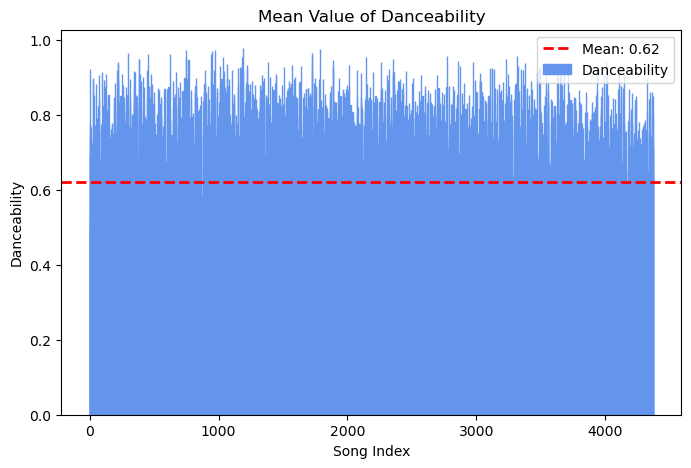

In [181]:
# Calculate Mean
danceabilitymean = songs['danceability'].mean()
print(f'The mean value of danceability is {danceabilitymean:.2f}')

# Bar Chart Setup
x = np.arange(len(songs))
y = songs['danceability']

plt.figure(figsize=(8, 5))

# Create Bars
plt.bar(x, y, color='cornflowerblue', edgecolor='cornflowerblue', label='Danceability')

# Mean Indication Line
plt.axhline(y=danceabilitymean, color='red', linestyle='--', linewidth=2, label=f'Mean: {danceabilitymean:.2f}')

# Labels and Title
plt.xlabel('Song Index')
plt.ylabel('Danceability')
plt.title('Mean Value of Danceability')
plt.legend()

# Show Plot
plt.show()


## Question 2

25th Percentile 24.06221408966148
75th Percentile 24.794144556267156


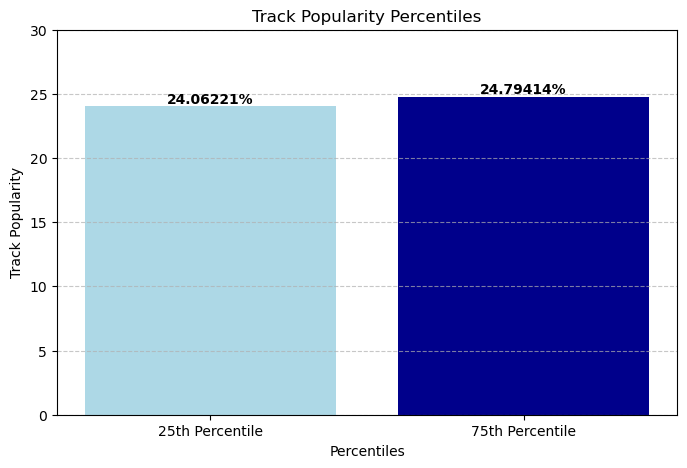

In [182]:
percentile_25 = songs['track_popularity'].quantile(0.25)
percentile_75 = songs['track_popularity'].quantile(0.75)

tracks_below_25 = (songs['track_popularity'] < percentile_25).mean() * 100
print("25th Percentile", tracks_below_25)

tracks_above_75 = (songs['track_popularity'] > percentile_75).mean() * 100
print("75th Percentile", tracks_above_75)
percentiles = ['25th Percentile', '75th Percentile']
values = [tracks_below_25, tracks_above_75]
# Create Bar chart
plt.figure(figsize=(8, 5))
bars = plt.bar(percentiles, values, color=['lightblue', 'darkblue'])
# Label the bars with percentages
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f"{value:.5f}%",
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.xlabel('Percentiles')
plt.ylabel('Track Popularity')
plt.title('Track Popularity Percentiles')
plt.ylim(0, 30)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## Question 3

Q3 (Tempo): 137.042
Median Tempo:  150.104
Q4 (Tempo): 241.426


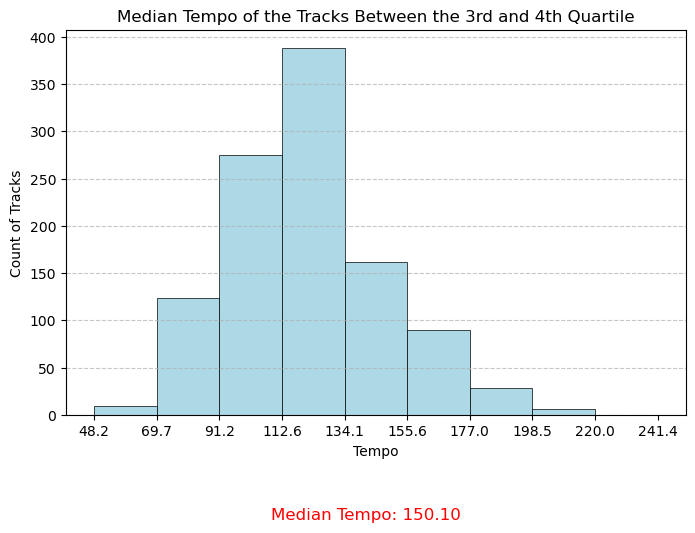

In [183]:
q3_tempo = songs['tempo'].quantile(0.75)
filtered_tempo_songs = songs[songs['tempo'] > q3_tempo]
median_tempo = filtered_tempo_songs['tempo'].median()
songs['tempo'] = pd.to_numeric(songs['tempo'], errors='coerce')
songs['track_popularity'] = pd.to_numeric(songs['track_popularity'], errors='coerce')
q3_tempo = songs['tempo'].quantile(0.75)
q4_tempo = songs['tempo'].quantile(1)
q3_popularity = songs['track_popularity'].quantile(0.75)
filtered_songs = songs[songs['track_popularity'] > q3_popularity]
print("Q3 (Tempo):", q3_tempo)
print("Median Tempo: ", median_tempo)
print("Q4 (Tempo):", q4_tempo)

bins = np.linspace(songs['tempo'].min(), songs['tempo'].max(), 10)

plt.figure(figsize=(8, 5))
counts, bins, bars = plt.hist(filtered_songs['tempo'], bins=bins, color='lightblue', edgecolor='black', linewidth=.5,
                              alpha=1)

plt.title("Median Tempo of the Tracks Between the 3rd and 4th Quartile")
plt.xlabel("Tempo")
plt.ylabel("Count of Tracks")
plt.xticks(bins.round(2))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.figtext(0.5, -0.1, f'Median Tempo: {median_tempo:.2f}', ha='center', fontsize=12, color='red')

plt.show()

## Question 4

Median Popularity: 54.0
Mode: 1.0


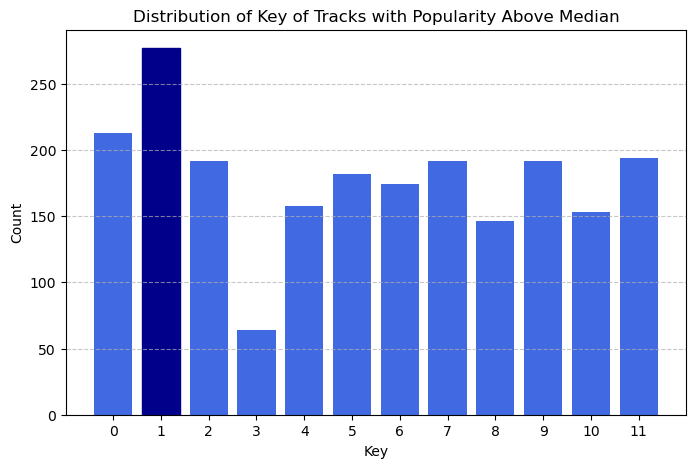

In [184]:
median_popularity = songs['track_popularity'].median()
print("Median Popularity:", median_popularity)

high_popularity_keys = songs[songs['track_popularity'] > median_popularity]['key']
mode_key_high_popularity = high_popularity_keys.mode().iloc[0]
print("Mode:", mode_key_high_popularity)
key_counts = high_popularity_keys.value_counts().sort_index()

# Plot Histogram
plt.figure(figsize=(8, 5))
bars = plt.bar(key_counts.index, key_counts.values, color='royalblue')
bars[key_counts.index.get_loc(mode_key_high_popularity)].set_color('darkblue')

plt.xlabel('Key')
plt.ylabel('Count')
plt.title('Distribution of Key of Tracks with Popularity Above Median')
plt.xticks(key_counts.index)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## Question 5

Mean -9.493576069549302
Standard Deviation 7.288703939173225
Median -7.301


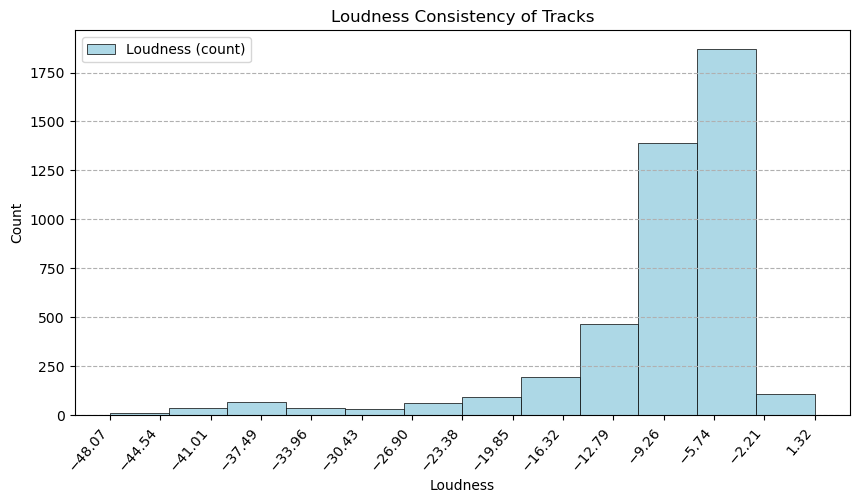

In [185]:
loudness_mean = songs['loudness'].mean()
loudness_std = songs['loudness'].std()
loudness_median = songs['loudness'].median()

print("Mean", loudness_mean)
print("Standard Deviation", loudness_std)
print("Median", loudness_median)

# Create histogram
plt.figure(figsize=(10, 5))
counts, bins, bars = plt.hist(songs['loudness'], bins=12, color='lightblue', edgecolor='black', linewidth=.5, alpha=1,
                              label='Loudness (count)')
plt.xticks(np.linspace(min(songs['loudness']), max(songs['loudness']), num=15), rotation=50, ha='right')

plt.xlabel('Loudness')
plt.ylabel('Count')
plt.title('Loudness Consistency of Tracks')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=1)
plt.show()


## Question 6

Pearson correlation: 0.25521


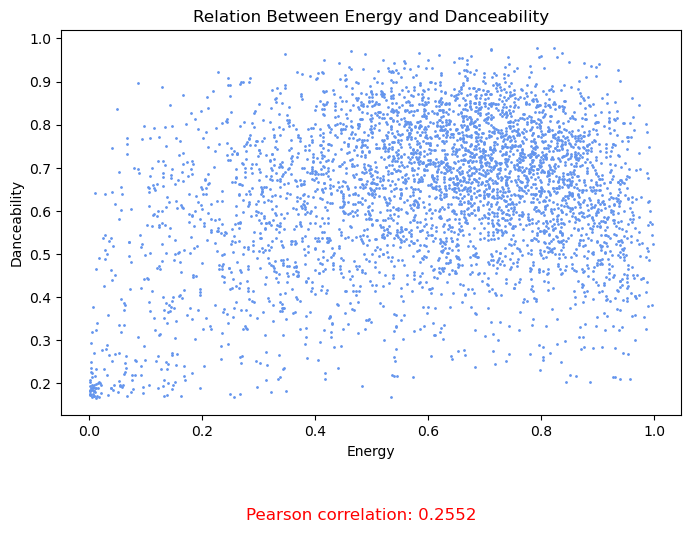

In [186]:
q6_df = pd.DataFrame({
    'a': q6_clean['energy'],
    'b': q6_clean['danceability']
})
pearson_corr_2 = q6_df.corr(method='pearson')

print(f"Pearson correlation: {pearson_corr_2.iloc[0, 1]:.5f}")

# Scatter Plot Setup
plt.figure(figsize=(8, 5))

# Scatter Plot
plt.scatter(q6_clean['energy'], q6_clean['danceability'], color='cornflowerblue', s=1)

# Labels and Title
plt.xlabel('Energy')
plt.ylabel('Danceability')
plt.title('Relation Between Energy and Danceability')

# Display Pearson Correlation Text below the plot
plt.figtext(0.5, -0.1, f'Pearson correlation: {pearson_corr_2.iloc[0, 1]:.4f}', ha='center', fontsize=12, color='red')

# Show Plot
plt.show()


## Question 7

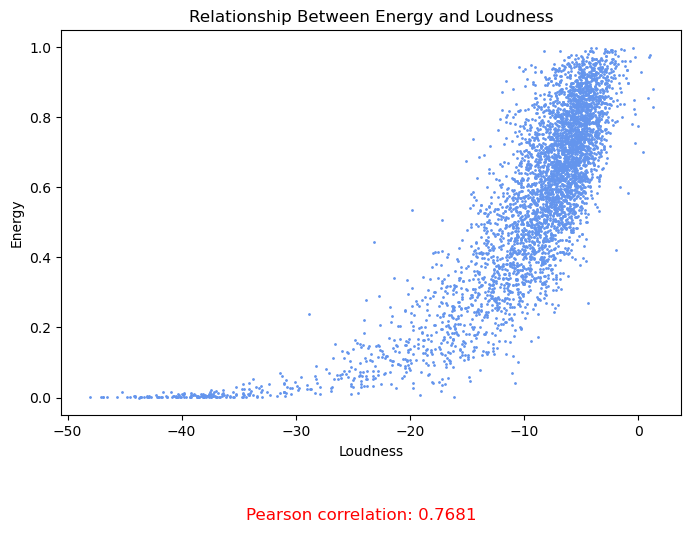

In [187]:
q7_df = pd.DataFrame({
    'a': q7_clean['loudness'],
    'b': q7_clean['energy']
})
pearson_corr = q7_df.corr(method='pearson')

# Scatter Plot Setup
plt.figure(figsize=(8, 5))

# Scatter Plot
plt.scatter(songs['loudness'], songs['energy'], color='cornflowerblue', s=1)

# Labels and Title
plt.xlabel('Loudness')
plt.ylabel('Energy')
plt.title('Relationship Between Energy and Loudness')

# Display Pearson Correlation Text
plt.figtext(0.5, -0.1, f'Pearson correlation: {pearson_corr.iloc[0, 1]:.4f}', ha='center', fontsize=12, color='red')

# Show Plot
plt.show()


## Question 8

Spearman correlation: 0.17


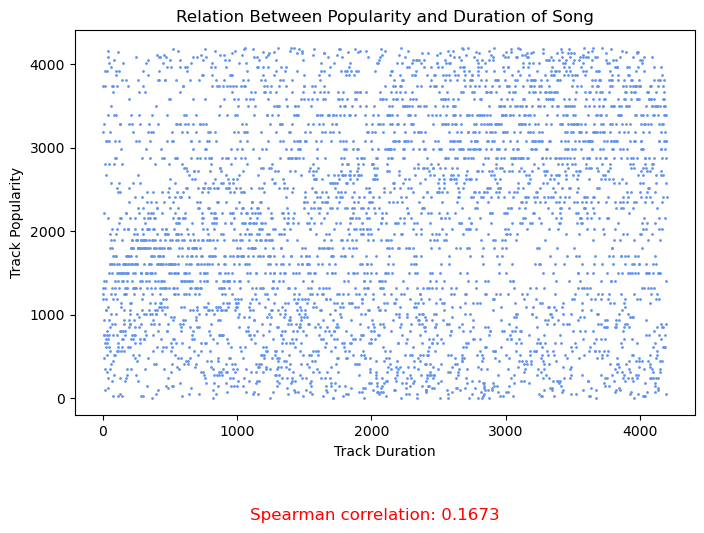

In [188]:
q8_clean['track_popularity'] = q8_clean['track_popularity'].rank()
q8_clean['duration_ms'] = q8_clean['duration_ms'].rank()

spearman_corr = q8_clean[['track_popularity', 'duration_ms']].corr(method='spearman')
print(f"Spearman correlation: {spearman_corr.iloc[0, 1]:.2f}")

# Scatter Plot Setup
plt.figure(figsize=(8, 5))

# Scatter Plot
plt.scatter(q8_clean['duration_ms'], q8_clean['track_popularity'], color='cornflowerblue', s=1)

# Labels and Title
plt.xlabel('Track Duration')
plt.ylabel('Track Popularity')
plt.title('Relation Between Popularity and Duration of Song')

# Display Spearman Correlation Text below the plot
plt.figtext(0.5, -0.1, f'Spearman correlation: {spearman_corr.iloc[0, 1]:.4f}', ha='center', fontsize=12, color='red')

# Show Plot
plt.show()

## Question 9

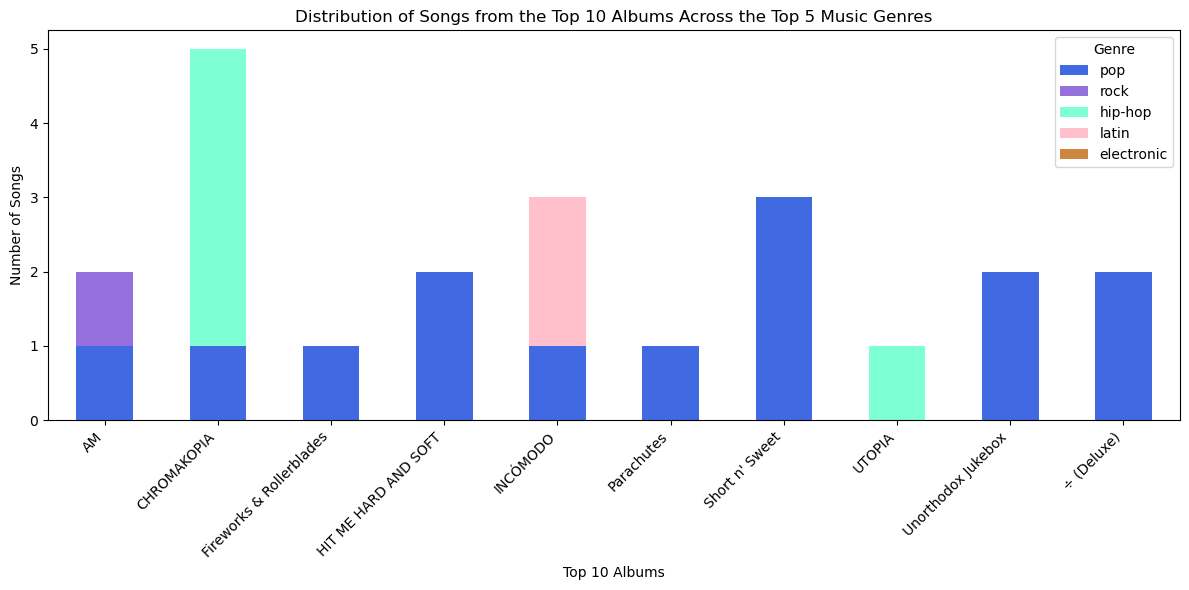

In [192]:
# Group by album and count the number of tracks
album_counts = songs.groupby('track_album_name').size()

# Filter out albums that have only one song
valid_albums = album_counts[album_counts > 1].index
songs = songs[songs['track_album_name'].isin(valid_albums)]

# Sort by track_popularity in descending order
songs = songs.sort_values(by='track_popularity', ascending=False)

# Get the top 10 album names based on track popularity
top_10_albums = songs[['track_album_name', 'track_popularity']].drop_duplicates().nlargest(10, 'track_popularity')

# Select top 10 albums based on track_popularity
top_albums = (
    songs.groupby("track_album_name")["track_popularity"].mean().nlargest(10).index
)

# Filter songs that belong to these albums
filtered_songs = songs[songs["track_album_name"].isin(top_albums)]

# Remove albums that have only one song
album_counts = filtered_songs["track_album_name"].value_counts()
valid_albums = album_counts[album_counts > 1].index
filtered_songs = filtered_songs[filtered_songs["track_album_name"].isin(valid_albums)]

# Identify the top 5 genres
top_genres = ["pop", "rock", "hip-hop", "latin", "electronic"]

# Create a pivot table to display the distribution
distribution = (
    filtered_songs[filtered_songs["playlist_genre"].isin(top_genres)]
    .groupby(["track_album_name", "playlist_genre"])
    .size()
    .unstack(fill_value=0)
)

distribution = distribution.reindex(columns=top_genres, fill_value=0)

distribution.plot(kind="bar", stacked=True, figsize=(12, 6),
                  color=["royalblue", "mediumpurple", "aquamarine", "pink", "peru"])
plt.xlabel("Top 10 Albums")
plt.ylabel("Number of Songs")
plt.title("Distribution of Songs from the Top 10 Albums Across the Top 5 Music Genres")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Genre")
plt.tight_layout()
plt.show()


## Question 10

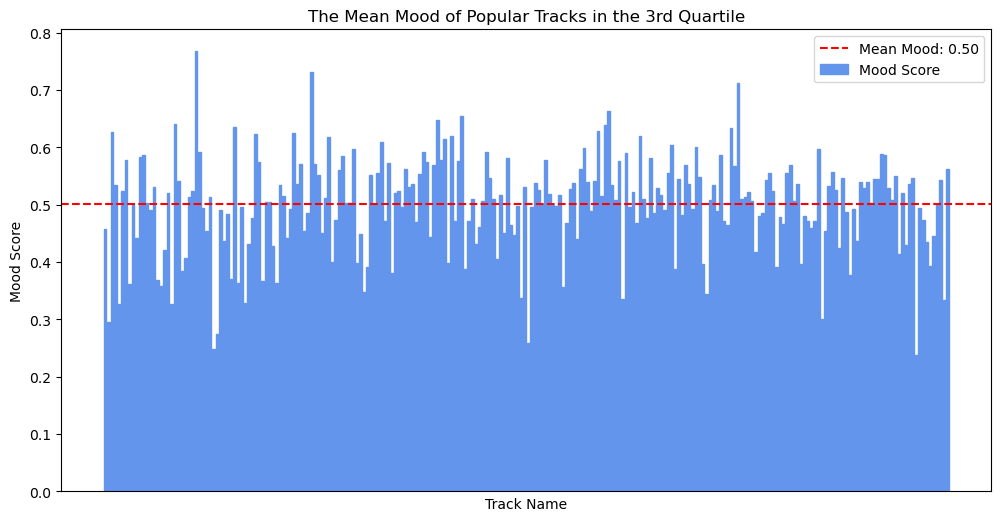

In [198]:
pop_q3 = songs['track_popularity'].quantile(.75)
q10_data = songs[(songs['track_popularity'] > pop_q3)].copy()
q10_data['mood'] = (q10_data['energy'] + q10_data['liveness'] + q10_data['danceability']) / 3
mean_mood = q10_data['mood'].mean()

q7_clean = songs[(songs['energy'] > energy_lb) & (songs['energy'] < energy_ub) & (songs['loudness'] > loud_lb) & (songs['loudness'] < loud_ub)].reset_index(drop=True)

# Plot the stacked bar chart
plt.figure(figsize=(12, 6))
plt.bar(q10_data['track_name'], q10_data['mood'], color='cornflowerblue', edgecolor='cornflowerblue', label='Mood Score')


# Add a horizontal line for the mean mood score
plt.axhline(y=mean_mood, color='red', linestyle='--', label=f'Mean Mood: {mean_mood:.2f}')

# Labels and title
plt.xlabel('Track Name')
plt.ylabel('Mood Score')
plt.title('The Mean Mood of Popular Tracks in the 3rd Quartile')
plt.xticks([])
plt.legend()
plt.show()